In [13]:
import pandas as pd

dataset_path = '/content/weather_forecast_data.csv'
data = pd.read_csv(dataset_path)

print("Dataset Shape:", data.shape)
print("Columns:", data.columns)
print("Missing Values:\n", data.isnull().sum())
print("Sample Data:\n", data.head())

Dataset Shape: (2506, 8)
Columns: Index(['Id', 'Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover',
       'Pressure', 'Rain', 'Extra_column'],
      dtype='object')
Missing Values:
 Id                 0
Temperature        1
Humidity           0
Wind_Speed         1
Cloud_Cover        0
Pressure           0
Rain               1
Extra_column    2506
dtype: int64
Sample Data:
    Id  Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain  \
0   1    23.720338  89.592641    7.335604    50.501694  1032.378759     rain   
1   2    27.879734  46.489704    5.952484     4.990053   992.614190  no rain   
2   3    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain   
3   1    23.720338  89.592641    7.335604    50.501694  1032.378759     rain   
4   5          NaN  89.592641    7.335604    50.501694  1032.378759     rain   

   Extra_column  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  


In [12]:
data_cleaned = data.drop(columns=["Extra_column"], errors='ignore')

data_cleaned = data_cleaned.drop_duplicates()

numeric_columns = ["Temperature", "Wind_Speed"]
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].mean())

data_cleaned = data_cleaned.dropna(subset=["Rain"])

print("\nShape After Cleaning:", data_cleaned.shape)
print("Missing Values After Cleaning:\n", data_cleaned.isnull().sum())


Shape After Cleaning: (2502, 7)
Missing Values After Cleaning:
 Id             0
Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


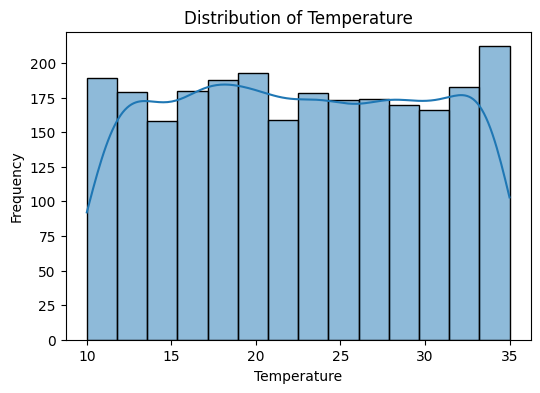

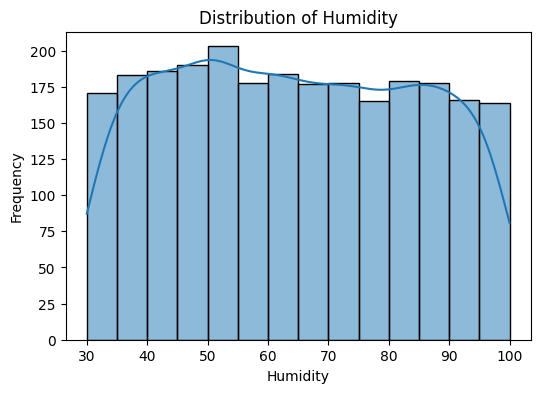

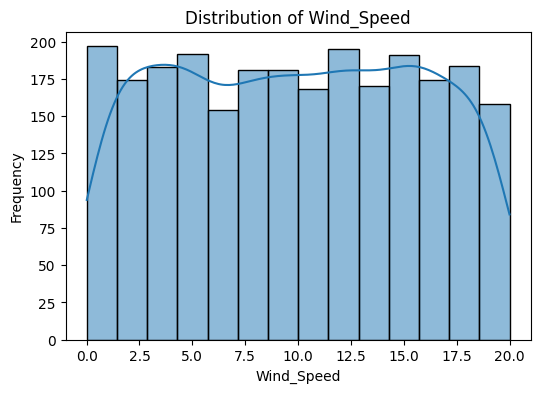

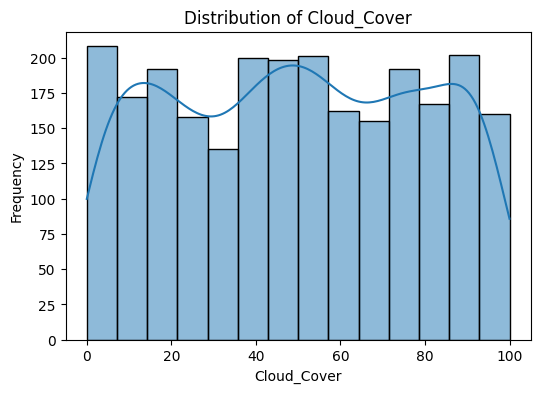

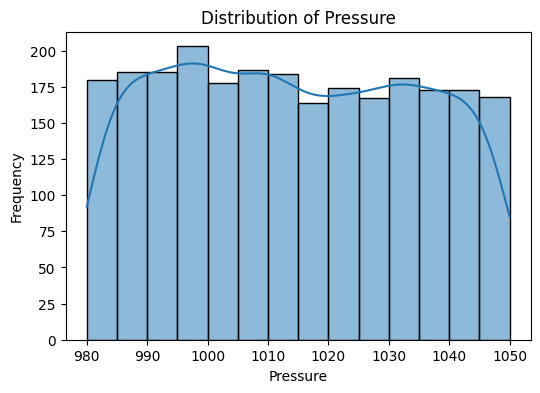

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

data_cleaned["Rain_Binary"] = data_cleaned["Rain"].map({"rain": 1, "no rain": 0})

numeric_features = ["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"]
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_cleaned[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

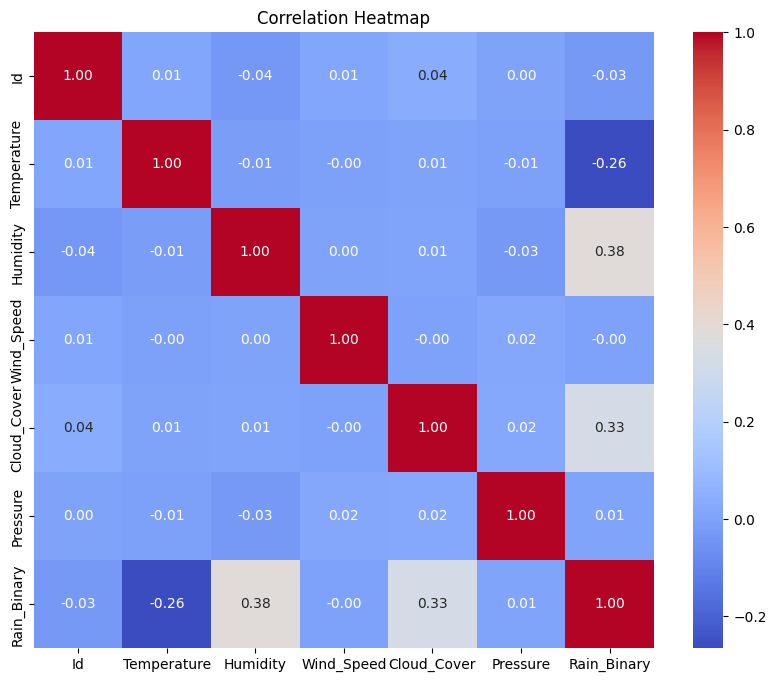

In [10]:
import numpy as np

numeric_data = data_cleaned.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = data_cleaned[numeric_features]
y = data_cleaned["Rain_Binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

print("\nLogistic Regression Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Results:
Confusion Matrix:
 [[633  16]
 [ 40  62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       649
           1       0.79      0.61      0.69       102

    accuracy                           0.93       751
   macro avg       0.87      0.79      0.82       751
weighted avg       0.92      0.93      0.92       751



In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Results:
Confusion Matrix:
 [[649   0]
 [  0 102]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       649
           1       1.00      1.00      1.00       102

    accuracy                           1.00       751
   macro avg       1.00      1.00      1.00       751
weighted avg       1.00      1.00      1.00       751



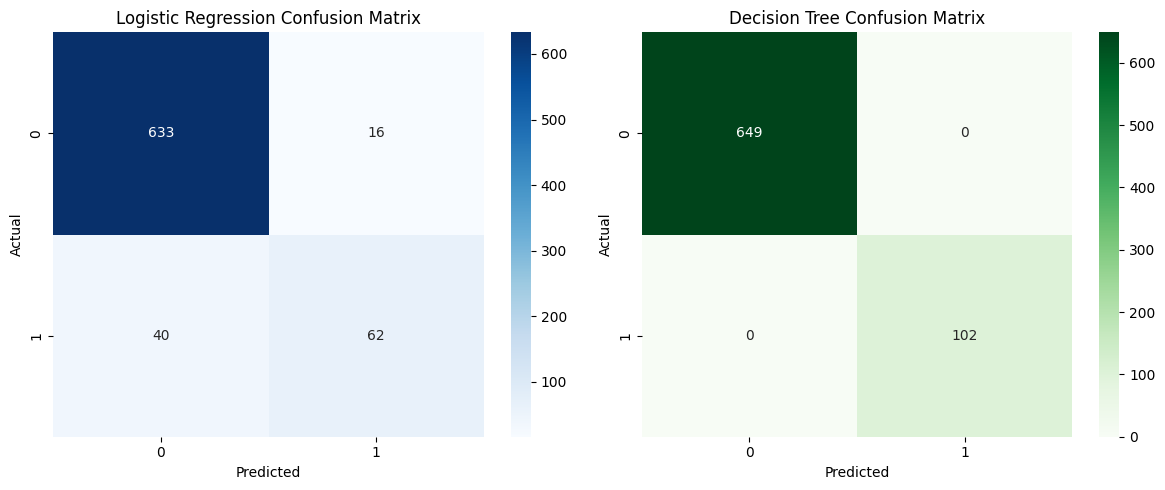

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()